#                                  BANK DATA SET -Intro to Neural Networks | Project

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
!pip install -U tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 3.2MB 43.1MB/s 
     |████████████████████████████████| 491kB 50.6MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [3]:
tf.__version__

'1.14.0'

In [0]:
import numpy as np
import pandas as pd

#Read Data
from google.colab import files

The points distribution for this case is as follows:

1.Read the data set

2.Drop the columns which are unique for all users like IDs (2.5 points)

3.Distinguish the feature and target set (2.5 points)

4.Divide the data set into training and test sets ( 2.5
points)

5.Normalize the train and test data (5 points)

6.Initialize & build the model (10 points)

7.Predict the results using 0.5 as a threshold (5 points)

8.Print the Accuracy score and confusion matrix (2.5 points)



# 1. Loading data file and reading date :-

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

#Read Data
from google.colab import files

In [11]:
upload =files.upload ()

Saving bank.csv to bank (1).csv


In [12]:
for fn in upload.keys():
 print('User uploaded file "{name}" with length "{length}" bytes'.format(
     name=fn, length=len(upload[fn])))

User uploaded file "bank.csv" with length "684858" bytes


In [13]:
import io
bank=pd.read_csv(io.StringIO(upload['bank.csv'].decode('utf-8')))
print (bank.head())

   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]


# 2. Drop the columns which are unique for all users like IDs 

In [14]:
#Dropping the unique keys and attributes that are irrelevant to contriute towards defining the target
bank1=bank.drop(['RowNumber','CustomerId','Surname'],axis=1)
bank1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [17]:
print (bank1.shape,'\n')
print (bank1.dtypes, '\n')
print (bank1.isnull().sum(),'\n')

(10000, 11) 

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object 

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64 



# 3.Cleaning data

In [18]:
dict = {'France' : '1', 'Spain' : '2', 'Germany' : '3'} 
  
# Print the dictionary 
print(dict) 
  
# Remap the values of the dataframe 
bank1.replace({"Geography": dict},inplace=True)

{'France': '1', 'Spain': '2', 'Germany': '3'}


In [19]:
dict1 = {'Male' : '1', 'Female' : '2'} 
  
# Print the dictionary 
print(dict1) 
  
# Remap the values of the dataframe 
bank1.replace({"Gender": dict1},inplace=True)

{'Male': '1', 'Female': '2'}


In [20]:
bank1['Geography']=bank1['Geography'].astype(float)
bank1['Gender']=bank1['Gender'].astype(float)
print (bank1.head(2))
bank1.dtypes

   CreditScore  Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619        1.0     2.0  ...               1        101348.88       1
1          608        2.0     2.0  ...               1        112542.58       0

[2 rows x 11 columns]


CreditScore          int64
Geography          float64
Gender             float64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
bank1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,1.749500,0.830433,1.00,1.00,1.000,3.0000,3.00
Gender,10000.0,1.454300,0.497932,1.00,1.00,1.000,2.0000,2.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


# 3. Distinguish the feature and target set

 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


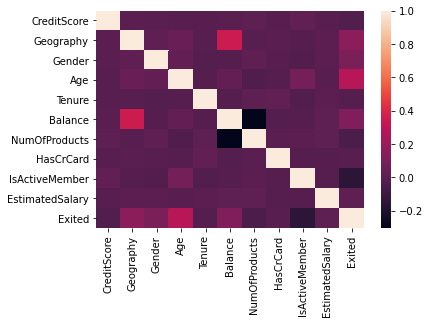

In [22]:
import seaborn as sns
sns.heatmap(bank1.corr())

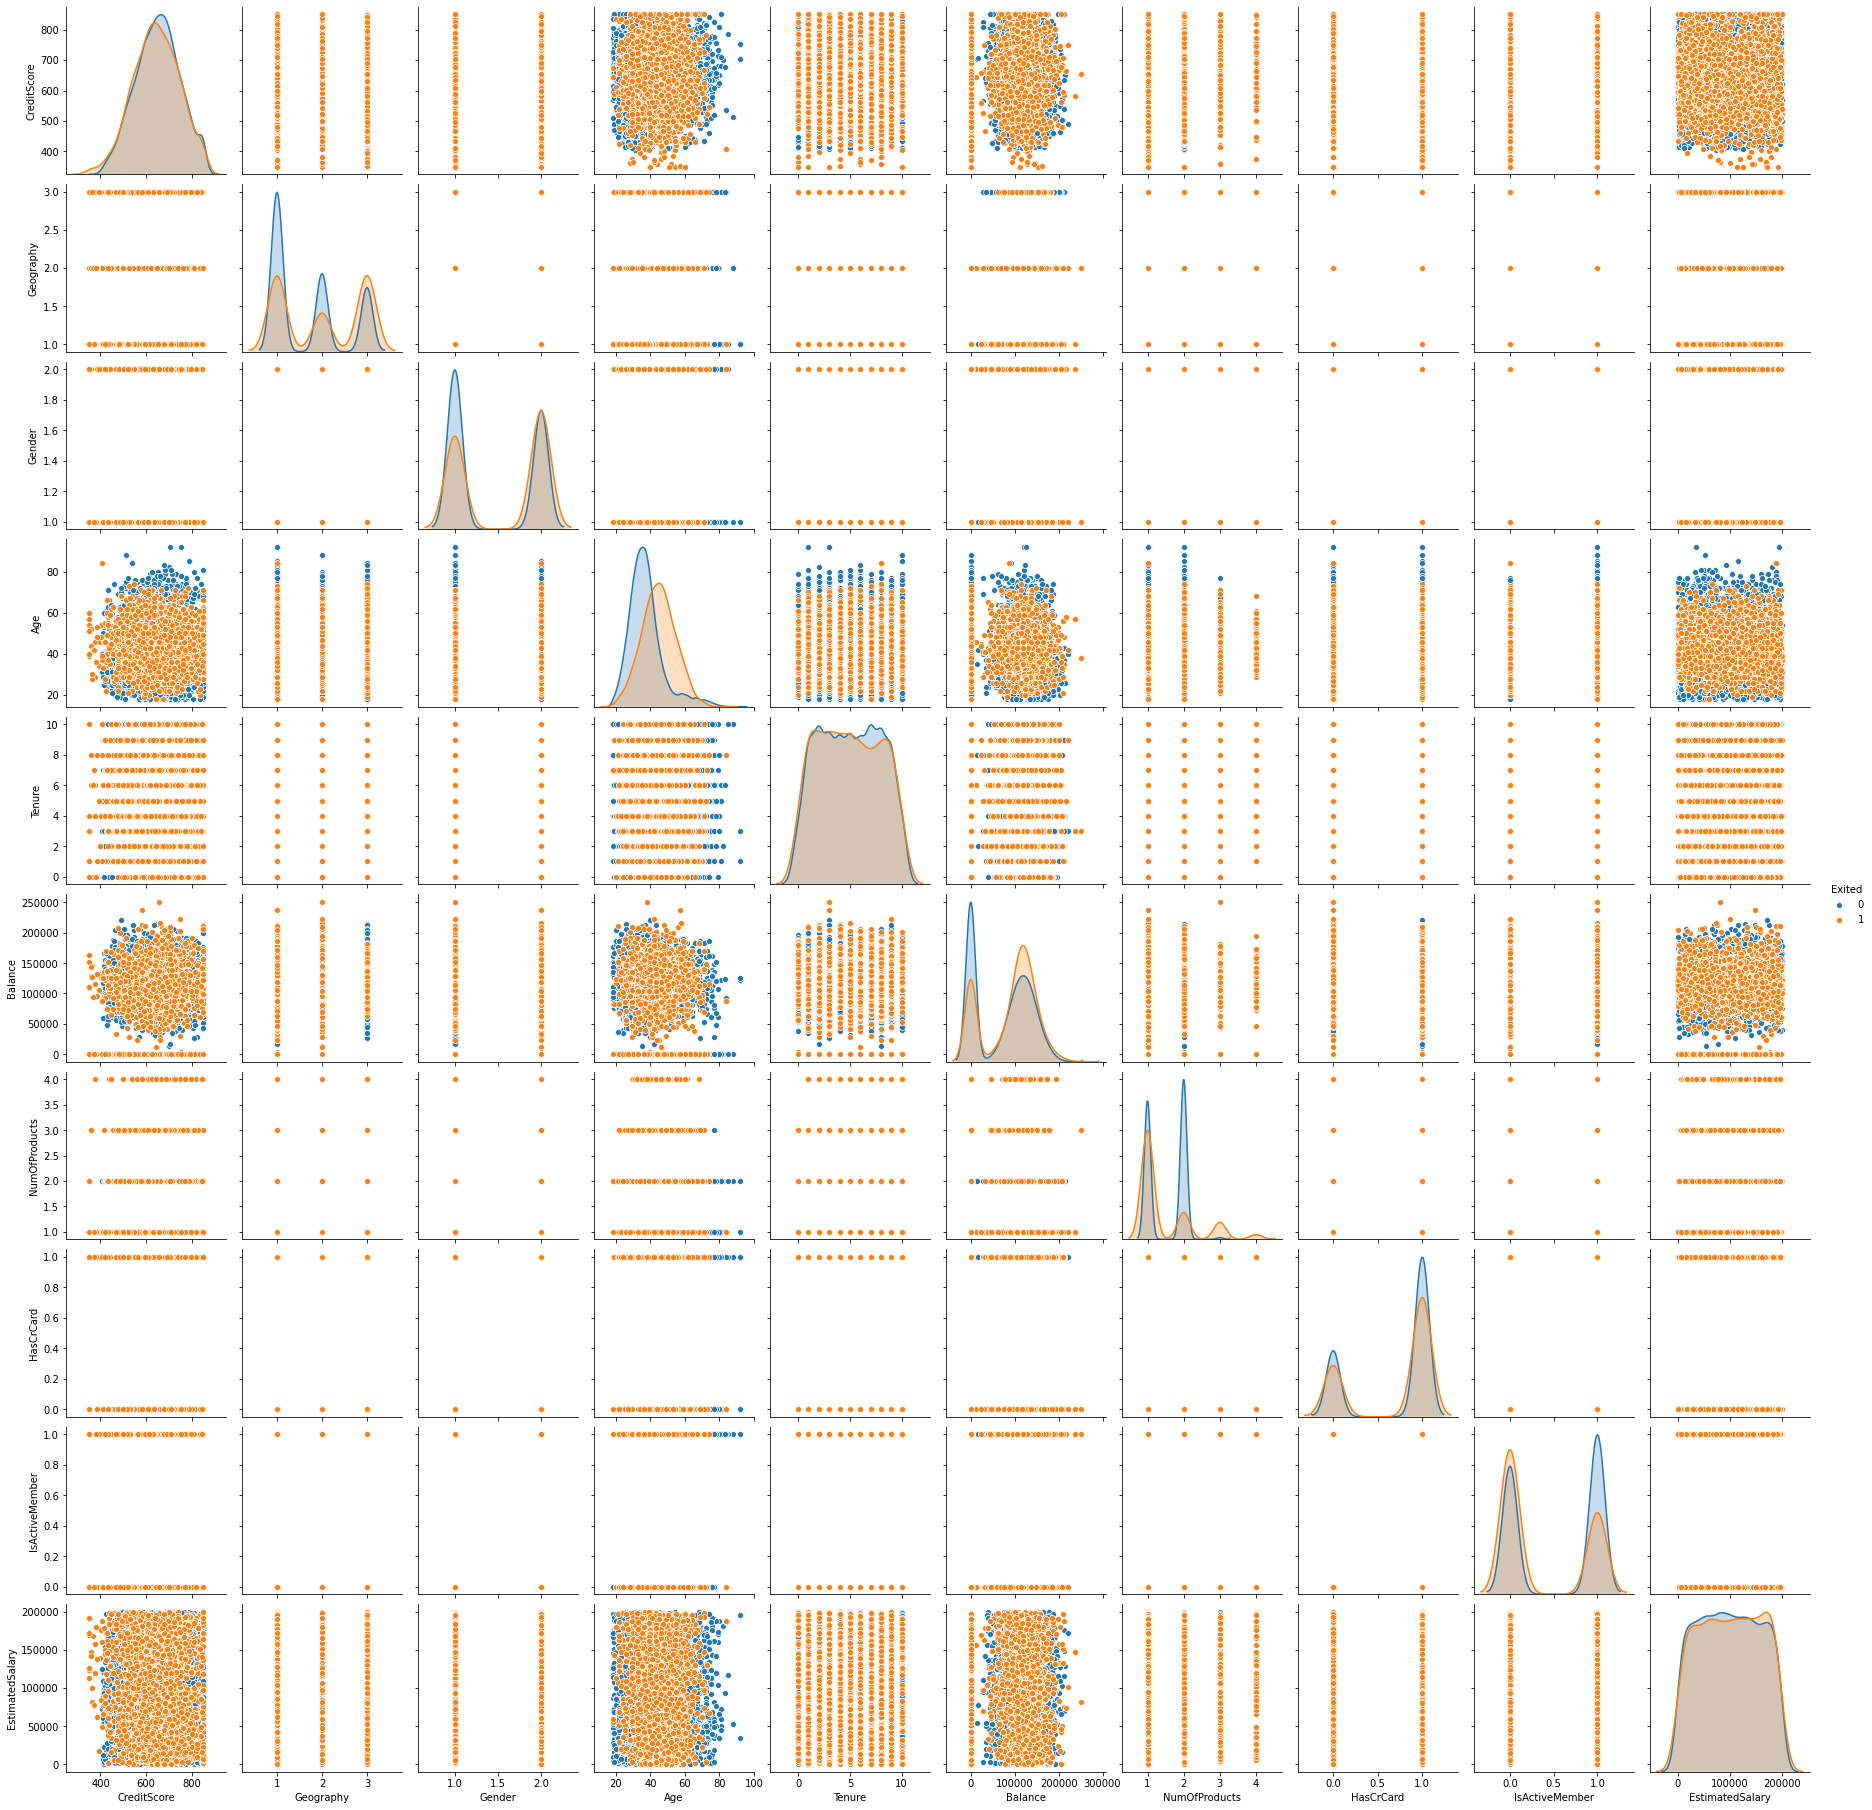

In [23]:
sns.pairplot(bank1,hue='Exited')

# 4 Dividing the data into training and test sets:

In [24]:
#Defining Target
y=bank1['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [25]:
#Defining feature and dropping target
x=bank1.drop('Exited',axis=1)
x.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1.0,2.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,2.0,41,1,83807.86,1,0,1,112542.58


#5. Normalizing the data set: 

In [0]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=10)

In [28]:
print('x_train')
print(x_train.count())
print('x_test')
print(x_test.count())
print('y_Train')
print(y_train.count())
print('y_Test')
print(y_test.count())

x_train
CreditScore        7000
Geography          7000
Gender             7000
Age                7000
Tenure             7000
Balance            7000
NumOfProducts      7000
HasCrCard          7000
IsActiveMember     7000
EstimatedSalary    7000
dtype: int64
x_test
CreditScore        3000
Geography          3000
Gender             3000
Age                3000
Tenure             3000
Balance            3000
NumOfProducts      3000
HasCrCard          3000
IsActiveMember     3000
EstimatedSalary    3000
dtype: int64
y_Train
7000
y_Test
3000


In [0]:
# Import StandardScaler from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train_scaled = scaler.transform(x_train)

# Scale the test set
x_test_scaled = scaler.transform(x_test)

In [0]:
# Import `Sequential` from `keras.models`
from tensorflow import keras
from keras.models import Sequential

# 6. Building model - 

In [0]:
# Import `Dense` from `keras.layers`
from keras.layers import Dense,Dropout,Activation,Flatten

In [0]:
#from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt

In [0]:
# Initialize the constructor
model = Sequential()

In [0]:
# Add an input layer 
model.add(Dense(6, activation='relu', input_shape=(10,)))

# Add an input layer 
#model.add(Dense(8, activation='relu', input_shape=(10,)))

# Add 1st hidden layer 
#model.add(Dense(6, activation='relu'))

# Add 2nd hidden layer 
model.add(Dense(4, activation='relu'))

# Add 3rd hidden layer 
model.add(Dense(2, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='relu'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [37]:
#model.compile(loss='binary_crossentropy'

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(x_train_scaled, y_train,epochs=20, batch_size=1, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.5577 - accuracy: 0.7873
Epoch 2/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.4193 - accuracy: 0.8254
Epoch 3/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.3901 - accuracy: 0.8347
Epoch 4/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.3734 - accuracy: 0.8413
Epoch 5/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.3771 - accuracy: 0.8407
Epoch 6/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.3703 - accuracy: 0.8439
Epoch 7/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.3715 - accuracy: 0.8449
Epoch 8/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.3630 - accuracy: 0.8479
Epoch 9/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.3622 - accu

# 7. Predict the results using 0.5 as a threshold:-

In [0]:
y_pred = np.round(model.predict(x_test_scaled))

# 8. Print the Accuracy score and confusion matrix:-

In [39]:
score = model.evaluate(x_test_scaled, y_test,verbose=1)

print(score)

3000/3000 [==============================] - 0s 27us/step
[0.4194253620704015, 0.847000002861023]


In [40]:
from sklearn import metrics

print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))

      0    1   2
0  2289   91   0
1   350  252  18
2     0    0   0


In [41]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      2380
         1.0       0.73      0.41      0.52       620
         2.0       0.00      0.00      0.00         0

    accuracy                           0.85      3000
   macro avg       0.53      0.46      0.48      3000
weighted avg       0.84      0.85      0.83      3000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
